In [ ]:
import dice_ml
import seaborn as sns
import pandas as pd
from dice_ml.utils import helpers  # helper functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from microbiome_ml.data_processing import load_data, filter_data, clr_transform
from microbiome_ml.modeling import train_model

In [12]:
abundance_path = "../Dataset/abundance_crc.txt"
metadata_path = "../Dataset/metadata_crc.txt"
target_column = "Group"
abundance, labels = load_data(
    abundance_file=abundance_path,
    metadata_file=metadata_path,
    target_column=target_column,
)
filtered_data = filter_data(abundance)
clr_data = clr_transform(filtered_data)

In [13]:
model = train_model(clr_data, labels, n_jobs=1)
clr_data['target'] = labels.values
dataset = clr_data
target = dataset['target']
train_dataset, test_dataset, _, _ = train_test_split(
    dataset, target, test_size=0.2, random_state=0, stratify=target
)
# model = LogisticRegression()
# model.fit(train_dataset.drop(columns="target"), train_dataset["target"])

# Dataset for training an ML model
d = dice_ml.Data(
    dataframe=train_dataset,
    continuous_features=dataset.columns[:-1].tolist(),
    outcome_name='target',
)

In [14]:
# Pre-trained ML model
m = dice_ml.Model(model=model, backend='sklearn')
# DiCE explanation instance
exp = dice_ml.Dice(d, m, method="genetic")
# Generate counterfactual examples
queries = test_dataset[test_dataset["target"] == 1].drop(columns="target")
query_instance = queries[0:1]
dice_exp = exp.generate_counterfactuals(
    query_instance,
    total_CFs=5,
    desired_class="opposite",
    verbose=True,
    proximity_weight=1.5,
    diversity_weight=1.0,
)
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe(show_only_changes=False, display_sparse_df=True)

  0%|          | 0/1 [00:00<?, ?it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

Diverse Counterfactuals found! total time taken: 00 min 01 sec
Query instance (original outcome : 1)


,Victivallis vadensis [1000],Akkermansia muciniphila [1008],Alistipes shahii [1052],unnamed Alistipes sp. HGB5 [1053],Alistipes putredinis [1054],Prevotella copri [1081],unnamed Capnocytophaga sp. oral taxon 329 [1086],Paraprevotella xylaniphila [1087],Parabacteroides distasonis [1088],Parabacteroides merdae [1089],...,Rothia dentocariosa [956],Bifidobacterium animalis [967],Bifidobacterium bifidum [968],Bifidobacterium breve [969],Bifidobacterium longum [970],Bifidobacterium dentium [971],Bifidobacterium adolescentis [972],Bifidobacterium catenulatum-Bifidobacterium pseudocatenulatum complex [973],Bifidobacterium angulatum [974],target
0,-1.392562,2.105299,-0.737418,1.244804,1.749803,8.121835,-3.015101,-2.174003,-0.337844,2.003905,...,-1.112975,-1.602572,-3.153677,-1.074443,-6.321915,-2.7292,-5.181201,-4.566145,-2.094948,1



Diverse Counterfactual set (new outcome: 0)


,Victivallis vadensis [1000],Akkermansia muciniphila [1008],Alistipes shahii [1052],unnamed Alistipes sp. HGB5 [1053],Alistipes putredinis [1054],Prevotella copri [1081],unnamed Capnocytophaga sp. oral taxon 329 [1086],Paraprevotella xylaniphila [1087],Parabacteroides distasonis [1088],Parabacteroides merdae [1089],...,Rothia dentocariosa [956],Bifidobacterium animalis [967],Bifidobacterium bifidum [968],Bifidobacterium breve [969],Bifidobacterium longum [970],Bifidobacterium dentium [971],Bifidobacterium adolescentis [972],Bifidobacterium catenulatum-Bifidobacterium pseudocatenulatum complex [973],Bifidobacterium angulatum [974],target
0,-1.392562,-0.548376,1.800337,2.861919,2.711536,-2.127697,-3.015101,-2.174003,1.815768,0.660552,...,-1.112975,-1.602572,-0.238136,-1.074443,0.757404,-2.729200,-1.525136,0.496683,-2.094948,0
0,-1.392562,2.596007,0.272641,1.296142,-1.470757,1.706093,-3.015101,2.636635,0.655888,2.576761,...,-1.112975,-1.602572,2.305235,-1.074443,-0.585362,-2.729200,-0.238090,1.324488,2.623536,0
0,-1.392562,3.403236,1.867250,0.439593,2.883049,0.434218,0.416260,-1.604783,-1.366703,-1.768416,...,-0.029630,-1.602572,0.380919,4.662667,2.545041,0.989808,0.250426,4.035103,-1.075384,0
0,1.588798,2.695385,-2.671311,-0.794906,2.898673,-1.000742,5.232442,4.678181,0.595954,2.450909,...,-1.112975,-1.602572,6.087924,0.930686,1.007520,0.937640,3.257947,3.131508,1.357929,0
0,4.060926,5.840709,1.027295,-0.399170,-0.223228,1.676552,2.328111,1.307696,1.781826,1.360997,...,-1.112975,-0.313850,5.135869,-0.026724,3.780432,2.358517,3.188324,-0.251440,-0.609401,0


In [ ]:
# Permitted ranges for each feature
feature_ranges = zip(
    dataset.columns[:-1].tolist(), dataset.min().values[:-1], dataset.max().values[:-1]
)
# create a dictionary of feature ranges
feature_ranges_dict = {
    feature: [min_val, max_val] for feature, min_val, max_val in feature_ranges
}
feature_ranges_dict

{'Victivallis vadensis [1000]': [np.float64(-1.3925617516865152),
  np.float64(6.297322109562378)],
 'Akkermansia muciniphila [1008]': [np.float64(-5.276237652706876),
  np.float64(6.515824389397224)],
 'Alistipes shahii [1052]': [np.float64(-6.670363251595118),
  np.float64(3.781335329511211)],
 'unnamed Alistipes sp. HGB5 [1053]': [np.float64(-5.382419535197975),
  np.float64(5.205879142903593)],
 'Alistipes putredinis [1054]': [np.float64(-7.616976449523818),
  np.float64(3.2251647557205945)],
 'Porphyromonas asaccharolytica [1056]': [np.float64(-0.6486819722867351),
  np.float64(7.745899685153904)],
 'Porphyromonas uenonis [1057]': [np.float64(-0.3702919842201866),
  np.float64(6.128188583752224)],
 'Prevotella buccalis [1059]': [np.float64(-0.2169319438326026),
  np.float64(4.696896074117631)],
 'Prevotella buccae [1065]': [np.float64(-0.36912392028723906),
  np.float64(5.1882130745873125)],
 'Prevotella dentalis [1067]': [np.float64(-0.2913483417897359),
  np.float64(3.5375575770

In [ ]:
imp = exp.global_feature_importance(queries)
print(imp.summary_importance)

100%|██████████| 18/18 [00:14<00:00,  1.23it/s]


{'Parabacteroides distasonis [1088]': 1.0, 'Bacteroides xylanisolvens [1093]': 1.0, 'Bacteroides ovatus [1094]': 1.0, 'Bacteroides uniformis [1100]': 1.0, 'Bacteroides dorei/vulgatus [1104]': 1.0, 'Streptococcus australis [1420]': 1.0, 'Streptococcus parasanguinis [1421]': 1.0, 'Ruminococcus bromii [1569]': 1.0, 'Clostridium leptum [1573]': 1.0, 'Faecalibacterium prausnitzii [1574]': 1.0, 'Faecalibacterium prausnitzii [1575]': 1.0, 'Faecalibacterium prausnitzii [1576]': 1.0, 'Faecalibacterium prausnitzii [1577]': 1.0, 'Subdoligranulum variabile [1578]': 1.0, 'unnamed Ruminococcaceae bacterium D16 [1580]': 1.0, 'Dorea formicigenerans [1604]': 1.0, 'Dorea longicatena [1605]': 1.0, '[Ruminococcus] torques [1610]': 1.0, 'Coprococcus comes [1616]': 1.0, 'unnamed Ruminococcus sp. 5_1_39BFAA [1620]': 1.0, 'unnamed Ruminococcus sp. SR1/5 [1621]': 1.0, 'Eubacterium ventriosum [1629]': 1.0, 'Eubacterium rectale [1630]': 1.0, 'Roseburia inulinivorans [1632]': 1.0, 'Escherichia coli [390]': 1.0, '

### Custom counterfactual-based feature importance


=== Query CCIS00281083ST-3-0 ===


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


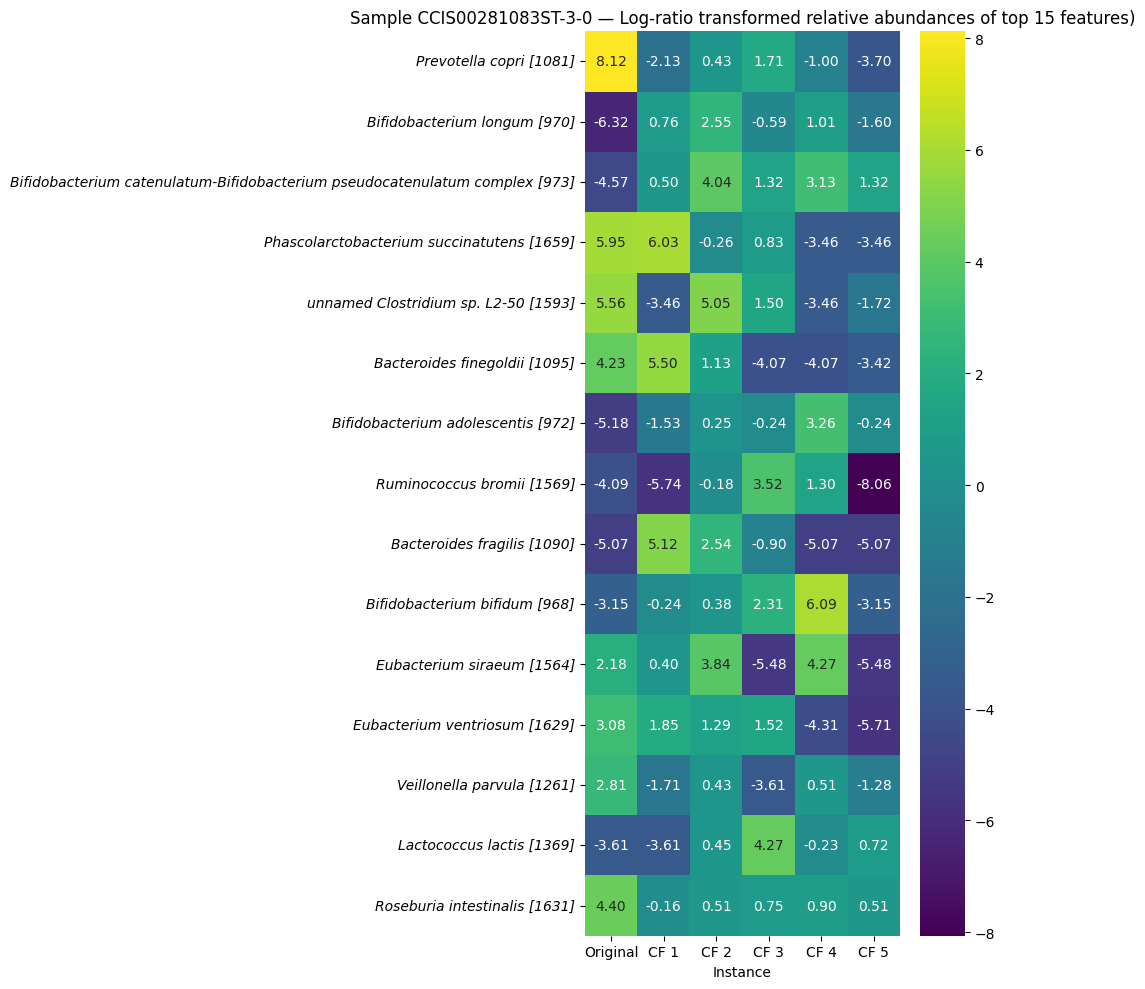

In [19]:
#select the number of samples to include (queries)
queries = test_dataset[test_dataset["target"] == 1].drop(columns="target")
query_instances = queries.iloc[0:1]  # 1 sample in this case

# loop through each sample instance for counterfactual generation
for idx, query_instance in query_instances.iterrows():
    print(f"\n=== Query {idx} ===")

    single_query_df = query_instance.to_frame().T

    dice_exp = exp.generate_counterfactuals(
        single_query_df,
        total_CFs=5,
        desired_class="opposite",
        verbose=False,
        proximity_weight=3.5,
        diversity_weight=1.0,
    )

#extracting the counterfactuals and merging with original values
    cf_df = dice_exp.cf_examples_list[0].final_cfs_df
    full_df = pd.concat([single_query_df, cf_df])
    full_df.index = ['Original'] + [f'CF {i+1}' for i in range(len(cf_df))]

#identify top n changing features based on highest delta value
    delta_df = full_df.drop(index='Original') - full_df.loc['Original']
    top_features = delta_df.abs().mean().sort_values(ascending=False).index[:15]
    full_df_top = full_df[top_features]

#visualization
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    full_df_top.T,
    cmap='viridis',
    annot=True,
    fmt=".2f",
    cbar=True
)
plt.title(f"Sample {idx} — Log-ratio transformed relative abundances of top 15 features)")
plt.ylabel("")
plt.xlabel("Instance")
plt.tight_layout()


plt.setp(ax.get_yticklabels(), style='italic')

plt.show()

## Evaluate Model

In [ ]:
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from skore import CrossValidationReport, EstimatorReport

from microbiome_ml.visualisation import plot_roc

In [ ]:
# split data
train_x, test_x, train_y, test_y = train_test_split(
    clr_data, labels, test_size=0.2, random_state=42, stratify=labels
)
# %%
model = train_model(train_x, train_y, n_jobs=3, cv_splits=10, n_estimators=200)

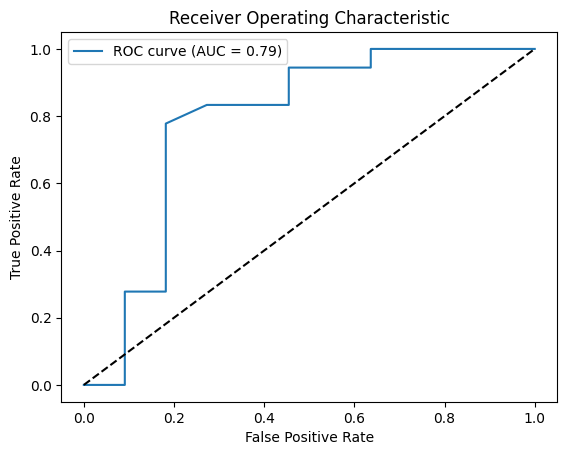

In [ ]:
test_probs = model.predict_proba(test_x)[:, 1]
plot_roc(test_y, test_probs)

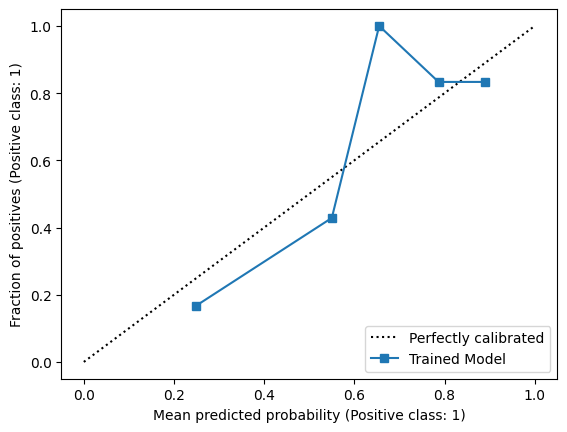

In [ ]:
CalibrationDisplay.from_estimator(
    model,
    test_x,
    test_y,
    n_bins=5,
    strategy="quantile",
    name="Trained Model",
)

In [ ]:
print(classification_report(
    test_y,
    model.predict(test_x),
))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.76      0.89      0.82        18

    accuracy                           0.76        29
   macro avg       0.76      0.72      0.73        29
weighted avg       0.76      0.76      0.75        29



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.76      0.89      0.82        18

    accuracy                           0.76        29
   macro avg       0.76      0.72      0.73        29
weighted avg       0.76      0.76      0.75        29



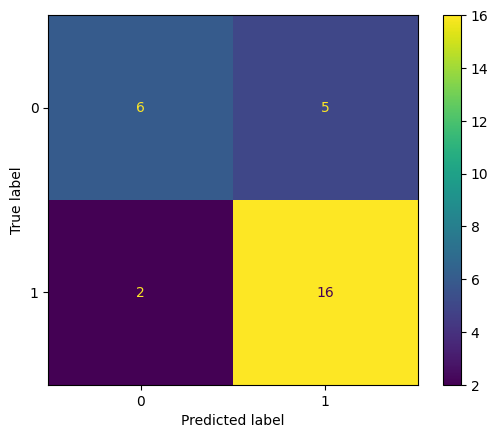

In [ ]:
# Make predictions on test data
y_pred = model.predict(test_x)
y_true = test_y

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
cv_report = EstimatorReport(model, X_test=test_x, y_test=test_y)

In [ ]:
# Display the help tree to see all the insights that are available to you
cv_report.help()

╭────────────────────── Tools to diagnose estimator GridSearchCV ──────────────────────╮
│ EstimatorReport                                                                      │
│ ├── .metrics                                                                         │
│ │   ├── .accuracy(...)         (↗︎)     - Compute the accuracy score.                 │
│ │   ├── .brier_score(...)      (↘︎)     - Compute the Brier score.                    │
│ │   ├── .confusion_matrix(...)         - Plot the confusion matrix.                  │
│ │   ├── .log_loss(...)         (↘︎)     - Compute the log loss.                       │
│ │   ├── .precision(...)        (↗︎)     - Compute the precision score.                │
│ │   ├── .precision_recall(...)         - Plot the precision-recall curve.            │
│ │   ├── .recall(...)           (↗︎)     - Compute the recall score.                   │
│ │   ├── .roc(...)                      - Plot the ROC curve.                         │
│ │   ├── .roc_auc(...)          (↗︎)     - Compute the ROC AUC score.                  │
│ │   ├── .timings(...)                  - Get all measured processing times related   │
│ │   │   to the estimator.                                                            │
│ │   ├── .custom_metric(...)            - Compute a custom metric.                    │
│ │   └── .summarize(...)                - Report a set of metrics for our estimator.  │
│ ├── .feature_importance                                                              │
│ │   └── .permutation(...)              - Report the permutation feature importance.  │
│ ├── .data                                                                            │
│ │   └── .analyze(...)                  - Plot dataset statistics.                    │
│ ├── .cache_predictions(...)            - Cache estimator's predictions.              │
│ ├── .clear_cache(...)                  - Clear the cache.                            │
│ ├── .get_predictions(...)              - Get estimator's predictions.                │
│ └── Attributes                                                                       │
│     ├── .X_test                        - Testing data                                │
│     ├── .y_test                        - Testing target                              │
│     ├── .estimator                     - Estimator to make the report from           │
│     ├── .estimator_                    - The cloned or copied estimator              │
│     ├── .estimator_name_               - The name of the estimator                   │
│     ├── .fit                           - Whether to fit the estimator on the         │
│     │   training data                                                                │
│     ├── .fit_time_                     - The time taken to fit the estimator, in     │
│     │   seconds                                                                      │
│     ├── .ml_task                       - No description available                    │
│     └── .pos_label                     - For binary classification, the positive     │
│         class                                                                        │
│                                                                                      │
│                                                                                      │
│ Legend:                                                                              │
│ (↗︎) higher is better (↘︎) lower is better                                             │
╰──────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
# Display the report metrics that was computed for you:
metrics_summary = cv_report.metrics.summarize()
metrics_summary

skore.MetricsSummaryDisplay(...)

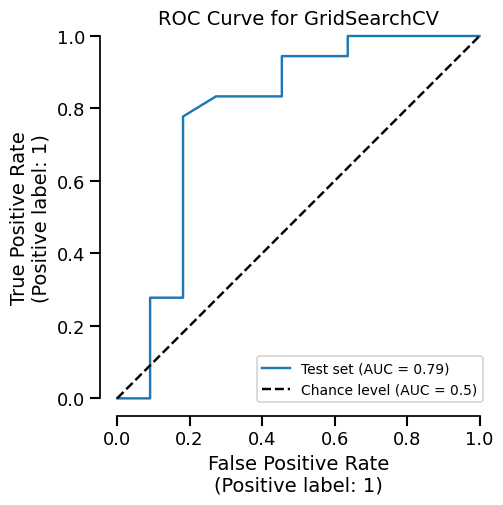

In [ ]:
# Display the ROC curve that was generated for you:
roc_plot = cv_report.metrics.roc()
roc_plot.plot()

In [ ]:
metric_report = cv_report.metrics.summarize().frame()
metric_report

GridSearchCV
Metric           Label / Average              
Precision        0                    0.750000
                 1                    0.761905
Recall           0                    0.545455
                 1                    0.888889
ROC AUC                               0.785354
Brier score                           0.176633
Fit time (s)                               NaN
Predict time (s)                      0.005096

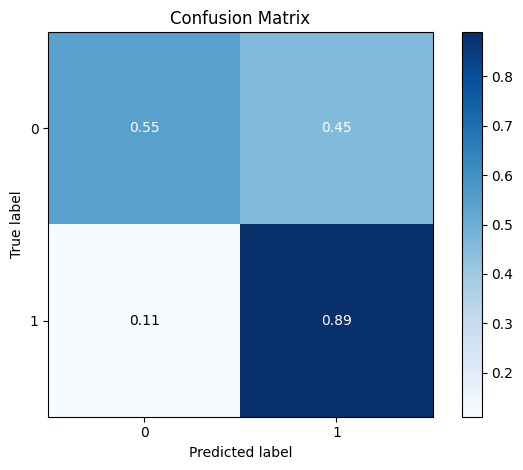

In [ ]:
cm_display = cv_report.metrics.confusion_matrix(normalize="true")
cm_display.plot()
plt.show()

AttributeError: This '_FeatureImportanceAccessor' has no attribute 'coefficients'